# Background

Houve uma agência de marketing determinada a otimizar o desempenho de suas campanhas online. Com um objetivo claro em mente e um orçamento limitado, eles se encontraram diante de uma difícil escolha entre duas abordagens criativas para anúncios: a Campanha A e a Campanha B. Ambas as campanhas foram projetadas com o mesmo objetivo e conjunto, diferindo apenas na criação do anúncio. Com um mês de duração para o teste A/B à frente, a equipe está ansiosa para descobrir qual das duas campanhas conquistará o melhor CTR e, assim, orientará a estratégia futura da agência.






# Definição do Problema de Negócios
O problema de negócios que a agência enfrenta é **_determinar qual das duas campanhas, Campanha A e Campanha B, gera o melhor CTR (Taxa de Cliques)_** com o objetivo de otimizar o retorno sobre o investimento em publicidade. Isso é crucial para direcionar recursos e estratégias futuras de marketing e garantir que o desempenho da campanha seja aprimorado.

### KPIs Necessários para a Análise:

• CTR (Taxa de Cliques): A métrica principal para avaliar o desempenho das campanhas é a Taxa de Cliques, que pode ser calculada dividindo o número de cliques no site pelo número de impressões e multiplicando por 100. Isso ajuda a determinar a eficácia das campanhas em atrair a atenção dos usuários.

• Gasto (Spend): O custo total de publicidade investido em cada campanha, ajudando a avaliar a eficiência em termos de retorno sobre o investimento.

• Número de Impressões (Impressions ): Essas métricas fornecem informações sobre a exposição da campanha ao público. Comparar o número de impressões  pode ajudar a entender o quão eficaz a campanha é em alcançar seu público-alvo.

Número de Cliques no Site (Website Clicks): É fundamental para determinar o engajamento dos usuários com os anúncios e a campanha.

# Dicionário dos Datasets

Fonte:  https://www.kaggle.com/datasets/amirmotefaker/ab-testing-dataset



> Abaixo estão todas as características no conjunto de dados:



• Campaign Name: The name of the campaign

• Date: Date of the record

• Spend: Amount spent on the campaign in dollars

• of Impressions: Number of impressions the ad crossed through the campaign

• Reach: The number of unique impressions received in the ad

• of Website Clicks: Number of website clicks received through the ads

• of Searches: Number of users who performed searches on the website

• of View Content: Number of users who viewed content and products on the website

• of Add to Cart: Number of users who added products to the cart

• of Purchase: Number of purchases




> A empresa realizou duas campanhas:

• Control Campaign

• Test Campaign

# Sumário executivo

Resumo Executivo: Análise A/B para Campanhas Publicitárias (01/08/2019 - 30/08/2019)

Com base nos dados e nas análises realizadas no teste A/B para duas campanhas publicitárias com orçamentos semelhantes, as seguintes conclusões e insights principais foram obtidos:

***Diferenças nas Abordagens Diárias de Investimento:***

• Os grupos de teste e controle implementaram estratégias diárias de investimento distintas, com o grupo de teste apresentando picos mais altos em cliques e uma possível Taxa de Cliques (CTR) superior. Enquanto isso, o grupo de controle exibiu mais flutuações em impressões, buscas e adições ao carrinho. Apesar dessas diferenças, ambos os grupos alcançaram resultados de compra comparáveis.

***Confirmação de Investimento Igual:***

• Apesar das variações observadas no desempenho, é crucial confirmar que o investimento financeiro para ambas as campanhas foi realmente o mesmo.

***Significância Estatística na CTR:***

• O teste A/B analisou especificamente a Taxa de Cliques (CTR) para ambas as campanhas. A análise estatística, com um nível de significância de 0,05, revelou uma diferença significativa na CTR entre os dois grupos. O grupo de teste demonstrou uma CTR substancialmente mais alta, indicando um anúncio mais atrativo.

***Detalhes dos Resultados do Teste A/B:***

• Os resultados do teste A/B mostraram uma diferença estatisticamente significativa nas taxas de cliques entre os grupos de controle e tratamento. O grupo de tratamento, com um aumento de 69,8%, superou o grupo de controle. Os intervalos de confiança também apoiaram essas conclusões.

***Consideração da Discrepância de Investimento:***

• Vale ressaltar que uma avaliação mais precisa teria sido possível se ambos os grupos tivessem seguido o mesmo investimento diário, eliminando possíveis fatores confundidores.

# Preparação

Importar Bibliotecas

In [2]:


# Bibliotecas incorporadas
from datetime import datetime
import random
import math

# Outras bibliotecas
import seaborn as sns
import pandas as pd
import shutil
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
from statsmodels.stats.power import TTestIndPower, tt_ind_solve_power
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.proportion import proportions_chisquare, confint_proportions_2indep, proportions_ztest
import statsmodels.stats.api as sm

from google.colab import drive
drive.mount('/content/drive/')

# Desativar avisos
from warnings import filterwarnings
filterwarnings('ignore')

# Defina a semente para geração de números aleatórios no numpy
SEED = 123
np.random.seed(SEED)

Mounted at /content/drive/


Load Data

In [3]:
# Definindo o caminho e carregando os dados
data_path = '/content/drive/MyDrive/ABTestingCourse/Data2/'

try:
    Control = pd.read_csv(data_path + 'Control.csv', delimiter=';')
    test = pd.read_csv(data_path + 'test.csv', delimiter=';')
except FileNotFoundError as e:
    print(e)
    exit(1)

# Defina os campos de data como date_time
Control['Date'] = pd.to_datetime(Control['Date'], format='%d.%m.%Y')
test['Date'] = pd.to_datetime(test['Date'], format='%d.%m.%Y')



# Análise Exploratória

In [4]:
Control.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,2019-08-04,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,2019-08-05,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,2019-08-01,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2019-08-02,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,2019-08-03,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,2019-08-04,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,2019-08-05,2297,114295,95138,5863,2106,858,956,768


Verificar valores ausentes


In [6]:
# Vamos verificar a ausência de dados. Qual é a taxa de valores nulos por coluna?
test.isnull().mean()


Campaign Name          0.0
Date                   0.0
Spend [USD]            0.0
# of Impressions       0.0
Reach                  0.0
# of Website Clicks    0.0
# of Searches          0.0
# of View Content      0.0
# of Add to Cart       0.0
# of Purchase          0.0
dtype: float64

In [7]:
Control.isnull().mean()

Campaign Name          0.000000
Date                   0.000000
Spend [USD]            0.000000
# of Impressions       0.033333
Reach                  0.033333
# of Website Clicks    0.033333
# of Searches          0.033333
# of View Content      0.033333
# of Add to Cart       0.033333
# of Purchase          0.033333
dtype: float64

Verificando o período do teste

In [8]:
# Mostrar estatísticas sobre a tabela

#A. Quantas linhas há na tabela?
#B. Qual é o intervalo de datas do campo de data na tabela?

print('# of rows:', test.shape[0])
print('Date range:', test.Date.min(), '-', test.Date.max())

# of rows: 30
Date range: 2019-08-01 00:00:00 - 2019-08-30 00:00:00


In [9]:
#A. Quantas linhas há na tabela?
#B. Qual é o intervalo de datas do campo de data na tabela?

print('# of rows:', Control.shape[0])
print('Date range:', Control.Date.min(), '-', Control.Date.max())

# of rows: 30
Date range: 2019-08-01 00:00:00 - 2019-08-30 00:00:00


Foi notado valores nulos na Campanha de Controle no dia 05/08/2019, houve gasto de verba nesse dia logo os valores ficaram ausentes devido a algum erro ao baixar os dados

Os dataframes precisarão serem unidos para prosseguir a análise

# Preparação

In [10]:
# Excluindo as datas 2019-08-05 de ambos os datasets devido a ausencia de dados dos dados no gp de controle
Control = Control.drop(4)
test = test.drop(4)


In [11]:
# Unindo os dataframes

Df_ab = pd.concat([Control, test], ignore_index=True)


In [28]:
Df_ab.to_csv('Df_ab.csv', index=False)

# Especifique o diretório de destino no Google Drive
diretorio_destino = '/content/drive/MyDrive/ABTestingCourse/Data2/'

# Mova o arquivo para o diretório de destino no Google Drive
shutil.move('Df_ab.csv', diretorio_destino)

'/content/drive/MyDrive/ABTestingCourse/Data2/Df_ab.csv'

### Verificando o novo Dataframe

In [13]:
# Exibir as cinco primeiras linhas da tabela de pré-teste.
Df_ab.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,2019-08-04,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,2019-08-06,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0


In [14]:
# Mostrar estatísticas sobre a nova tabela

#A. Quantas linhas há na tabela?
#B. Qual é o intervalo de datas do campo de data na tabela?

print('# of rows:', Df_ab.shape[0])
print('Date range:', Df_ab.Date.min(), '-', Df_ab.Date.max())

# of rows: 58
Date range: 2019-08-01 00:00:00 - 2019-08-30 00:00:00


In [15]:
# Vamos verificar a ausência de dados. Qual é a taxa de valores nulos por coluna?
Df_ab.isnull().mean()

Campaign Name          0.0
Date                   0.0
Spend [USD]            0.0
# of Impressions       0.0
Reach                  0.0
# of Website Clicks    0.0
# of Searches          0.0
# of View Content      0.0
# of Add to Cart       0.0
# of Purchase          0.0
dtype: float64

# Efetuando uma análise bivariada dos dados numéricos

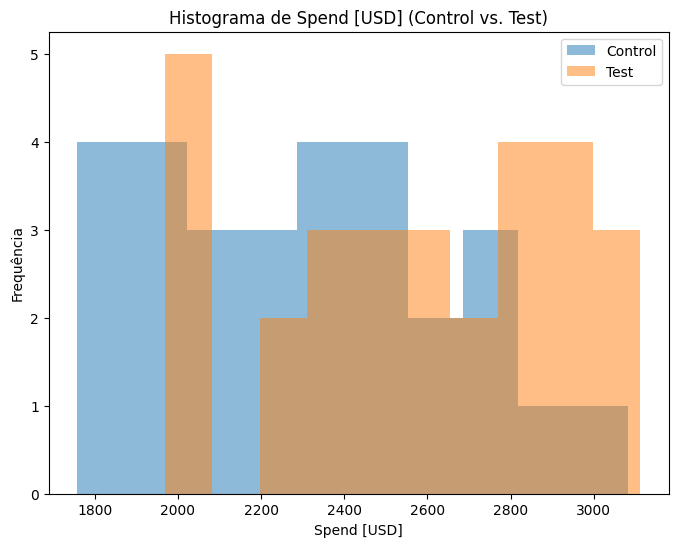

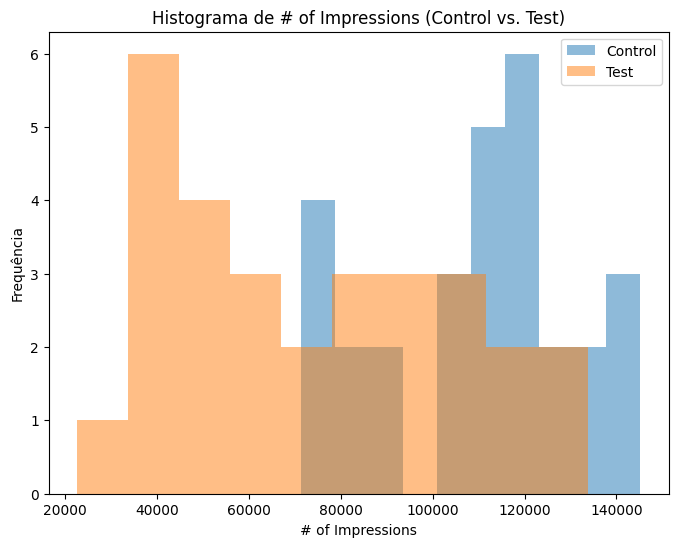

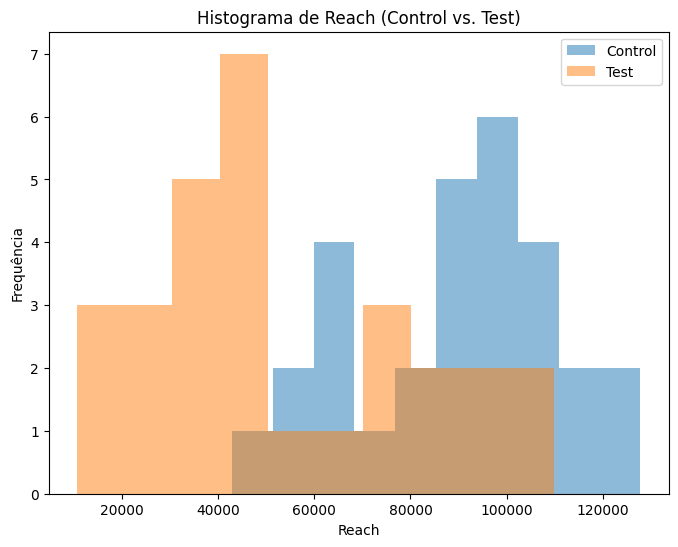

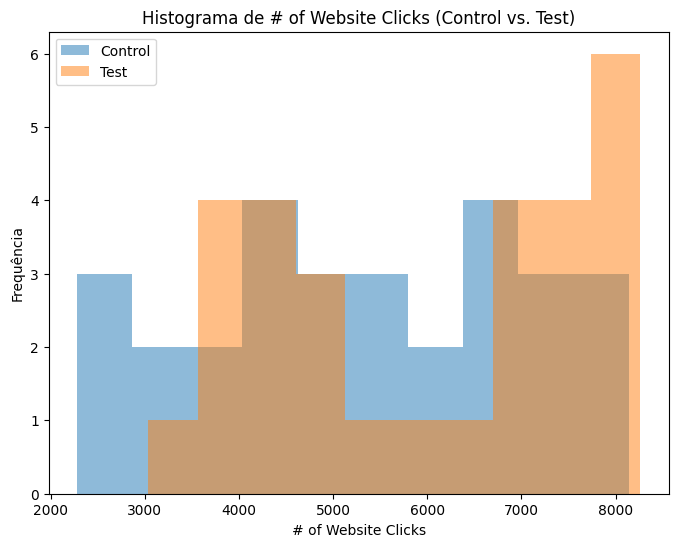

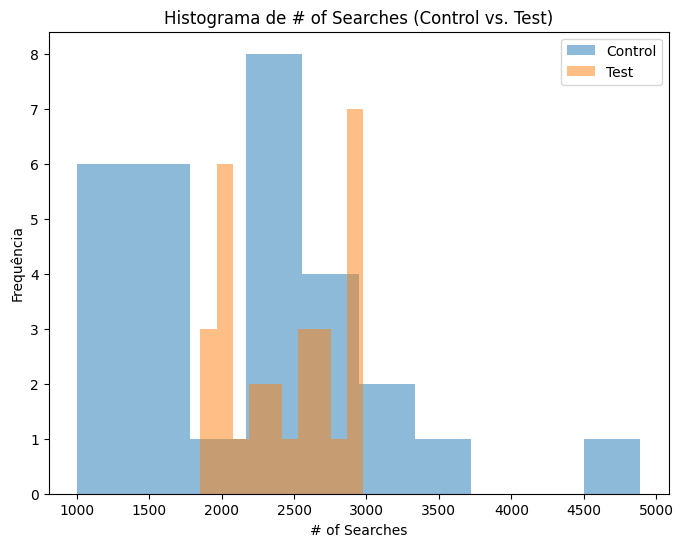

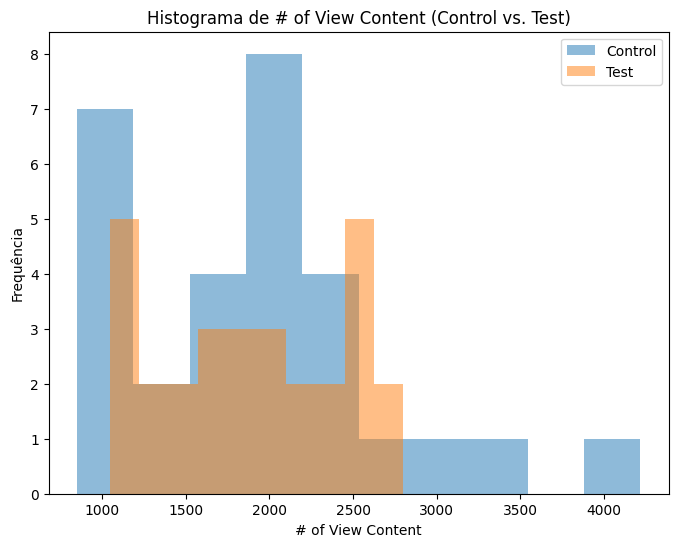

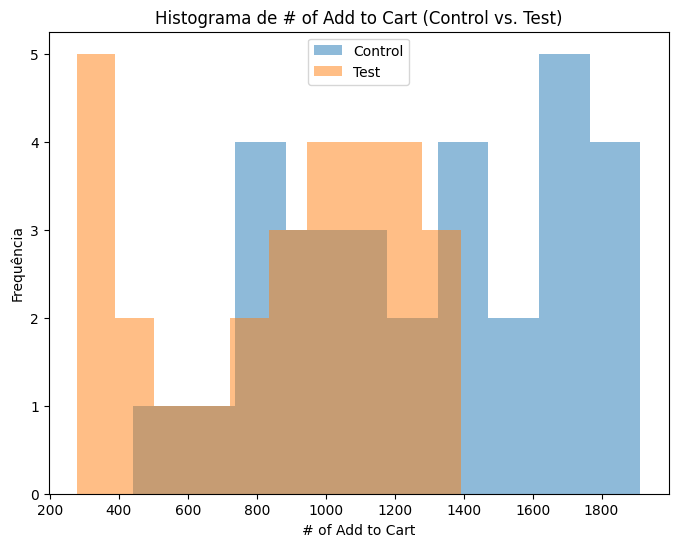

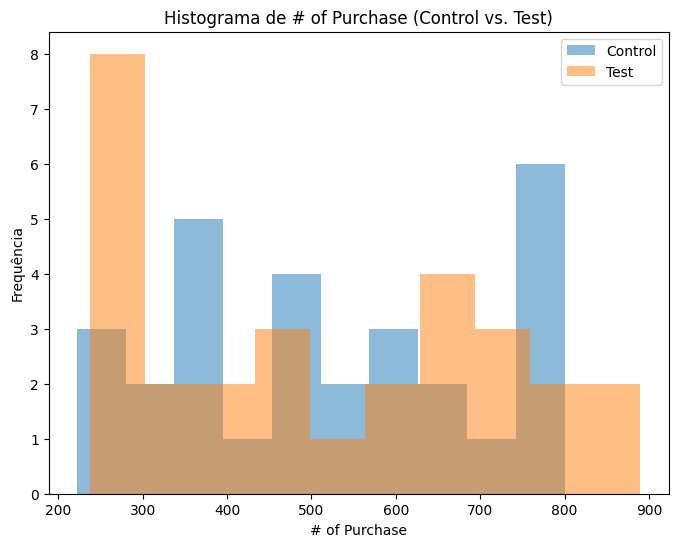

In [16]:
## Criar um único histograma para comparar as métricas numéricas entre Control e Test
numerical_columns = [
    "Spend [USD]",
    "# of Impressions",
    "Reach",
    "# of Website Clicks",
    "# of Searches",
    "# of View Content",
    "# of Add to Cart",
    "# of Purchase"
]

## Realizar uma análise bivariada e criar um único histograma para cada coluna numérica
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(Df_ab[Df_ab["Campaign Name"] == "Control Campaign"][column], bins=10, alpha=0.5, label="Control")
    plt.hist(Df_ab[Df_ab["Campaign Name"] == "Test Campaign"][column], bins=10, alpha=0.5, label="Test")
    plt.xlabel(column)
    plt.ylabel("Frequência")
    plt.title(f"Histograma de {column} (Control vs. Test)")
    plt.legend()
    plt.show()

### Resultados da análise exploratória

Os grupos diferiram em suas abordagens de investimento diárias, o grupo de teste mostrou picos mais altos em cliques e uma possível taxa de cliques maior, enquanto o grupo de controle teve mais variações em impressões, buscas e adições ao carrinho. Ambos os grupos tiveram resultados de compra comparáveis.

Vale a verificação se o investimento foi o mesmo

Renomeando as Colunas

In [17]:
novo_nome_colunas = {
    'Campaign Name': 'Campaign_Name',
    'Date': 'Date',
    'Spend [USD]': 'Spend',
    '# of Impressions': 'Impressions',
    'Reach': 'Reach',
    '# of Website Clicks': 'Website_Clicks',
    '# of Searches': 'Searches',
    '# of View Content': 'View_Content',
    '# of Add to Cart': 'Add_to_Cart',
    '# of Purchase': 'Purchase'
}

# Use o método rename() para renomear as colunas com base no dicionário
Df_ab.rename(columns=novo_nome_colunas, inplace=True)

Excluindo as colunas desnecessárias

In [18]:
# Excluir as colunas desnecessárias
colunas_a_excluir = ['Reach', 'Searches', 'View_Content', 'Add_to_Cart', 'Purchase']
Df_ab = Df_ab.drop(colunas_a_excluir, axis=1)


Salvando um novo dataframe limpo


In [29]:
# Salvar o DataFrame no arquivo CSV, substituindo o arquivo se ele já existir
Df_ab.to_csv('Df_ab2.csv', index=False, mode='w')

# Especifique o diretório de destino no Google Drive
diretorio_destino = '/content/drive/MyDrive/ABTestingCourse/Data2/'

# Mova o arquivo para o diretório de destino no Google Drive
shutil.move('Df_ab2.csv', diretorio_destino)

'/content/drive/MyDrive/ABTestingCourse/Data2/Df_ab2.csv'

Indice da preparação


Estabelecendo a Hipótese

In [20]:
# Parâmetros experimentais
alpha = 0.05  # Definindo o limite de probabilidade em 0,05. Se o valor p for menor que 0,05, rejeite Ho..
power = 0.80  # Quero que haja 80% de chance de detectar um efeito significativo
mde = 0.10    # Detecte uma melhoria de 10% na taxa de inscrição com significância estatística

# Proporções se o efeito existir
p1 = 0.10           # Controle
p2 = p1 * (1 + p1)  # Tratamento

# Rodando o Experimento

Vamos dar uma olhada na etapa que envolve a execução de um experimento. O código abaixo é uma versão simplificada de como os dados são coletados e analisados em uma plataforma de experimentos em larga escala.

In [21]:
# Calcular o CTR para o grupo de controle
AB_control = Df_ab[Df_ab['Campaign_Name'] == 'Control Campaign']
AB_control_clicks = AB_control['Website_Clicks'].sum()
AB_control_impressions = AB_control['Impressions'].sum()
AB_control_spend = AB_control['Spend'].sum()
AB_control_ctr = (AB_control_clicks / AB_control_impressions) * 100

# Calcular o CTR para o grupo de tratamento
AB_treatment = Df_ab[Df_ab['Campaign_Name'] == 'Test Campaign']
AB_treatment_clicks = AB_treatment['Website_Clicks'].sum()
AB_treatment_impressions = AB_treatment['Impressions'].sum()
AB_control_spend = AB_treatment['Spend'].sum()
AB_treatment_ctr = (AB_treatment_clicks / AB_treatment_impressions) * 100

# Mostrar o CTR
print(f'Control Spend: R$ {AB_control_spend:} ')
print(f'Treatment Spend: R$ {AB_control_spend:} ')
print(f'Control CTR: {AB_control_ctr:.4f}%')
print(f'Treatment CTR: {AB_treatment_ctr:.4f}%')



Control Spend: R$ 74595 
Treatment Spend: R$ 74595 
Control CTR: 4.8565%
Treatment CTR: 8.2471%


Nota-se que o valor gasto nas duas Campanhas foi o mesmo, contudo o CTR da campanha de teste foi maior

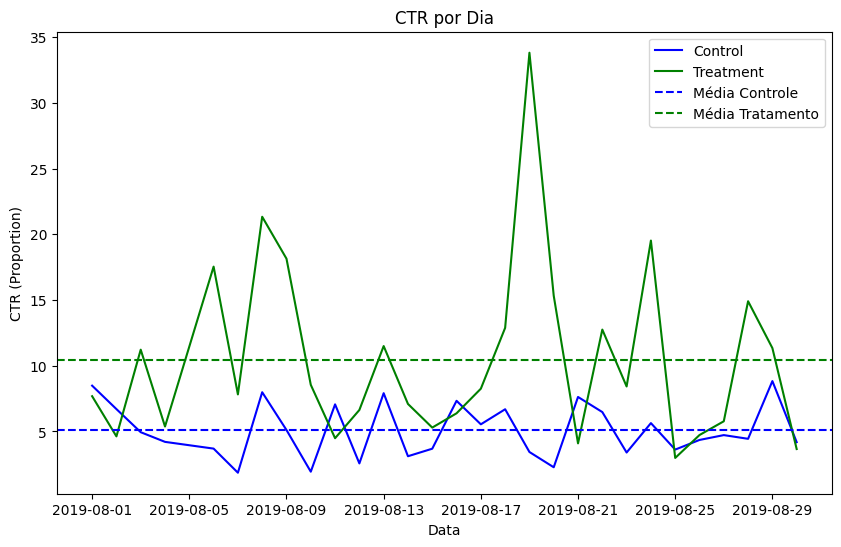

In [22]:

# Calcular o CTR por dia para o grupo de controle e tratamento
CTR_per_day = Df_ab.groupby(['Campaign_Name', 'Date'])['Website_Clicks', 'Impressions'].sum()
CTR_per_day['CTR'] = (CTR_per_day['Website_Clicks'] / CTR_per_day['Impressions']) * 100

# Separar os dados por grupo
control_data = CTR_per_day[CTR_per_day.index.get_level_values('Campaign_Name') == 'Control Campaign']
treatment_data = CTR_per_day[CTR_per_day.index.get_level_values('Campaign_Name') == 'Test Campaign']

# Plotar o CTR por dia
plt.figure(figsize=(10, 6))
plt.plot(control_data.index.get_level_values('Date'), control_data['CTR'], label='Control', color='b')
plt.plot(treatment_data.index.get_level_values('Date'), treatment_data['CTR'], label='Treatment', color='g')

# Adicionar linhas para a média
plt.axhline(control_data['CTR'].mean(), color='b', linestyle='--', label='Média Controle')
plt.axhline(treatment_data['CTR'].mean(), color='g', linestyle='--', label='Média Tratamento')

plt.title('CTR por Dia')
plt.xlabel('Data')
plt.ylabel('CTR (Proportion)')
plt.legend()
plt.show()


A campanha de teste teve predominância na taxa de cliques ao longo do mês, mostrando possuir um anúncio mais atrativo

# Validando o teste

### Teste Qui-Quadrado

In [23]:
# Vamos começar com o teste qui-quadrado

# Executando teste
AB_chistats, AB_pvalue, AB_tab = proportions_chisquare([AB_control_clicks, AB_treatment_clicks], nobs=[AB_control_impressions, AB_treatment_impressions])

# Obtendo datas
first_date = Df_ab['Date'].min().date()
last_date = Df_ab['Date'].max().date()

# Rodando os resultados
print(f'-------- AB Test Ctr ({first_date} - {last_date})---------\n')
print('Ho: O Ctr das duas campanhas são as mesmas.')
print('Ha: O Ctr das duas campanhas são diferentes.\n')
print(f'Significance level: {alpha}')

print(f'Chi-Square = {AB_chistats:.3f} | P-value = {AB_pvalue:.3f}')

print('\nConclusion:')
if AB_pvalue < alpha:
  print('Rejeite Ho e conclua que há diferenças no CTR de ambas as campanhas.')
else:
  print('Falha em rejeitar Ho.')

-------- AB Test Ctr (2019-08-01 - 2019-08-30)---------

Ho: O Ctr das duas campanhas são as mesmas.
Ha: O Ctr das duas campanhas são diferentes.

Significance level: 0.05
Chi-Square = 25103.402 | P-value = 0.000

Conclusion:
Rejeite Ho e conclua que há diferenças no CTR de ambas as campanhas.


### Z-Test para Proporções

In [24]:
# Dados de controle e tratamento
control_clicks = AB_control_clicks
control_impressions = AB_control_impressions
treatment_clicks = AB_treatment_clicks
treatment_impressions = AB_treatment_impressions

# Realizar o teste de diferença de proporções
count = np.array([control_clicks, treatment_clicks])
nobs = np.array([control_impressions, treatment_impressions])
stat, pval = proportions_ztest(count, nobs)

# Imprimir resultados
print(f'-------- AB Test Ctr ({first_date} - {last_date})---------\n')
print('Ho: O Ctr das duas campanhas são as mesmas.')
print('Ha: O Ctr das duas campanhas são diferentes.\n')
print(f'Significance level: {alpha:.3f}')

print(f'Z-Statistic = {stat:.3f} | P-value = {pval:.3f}')

print('\nConclusion:')
if pval < alpha:
  print('Rejeite Ho e conclua que há diferenças nas taxas de cliques (CTR) entre ambas as campanhas.')
else:
  print('Falha em rejeitar Ho.')

-------- AB Test Ctr (2019-08-01 - 2019-08-30)---------

Ho: O Ctr das duas campanhas são as mesmas.
Ha: O Ctr das duas campanhas são diferentes.

Significance level: 0.050
Z-Statistic = -158.441 | P-value = 0.000

Conclusion:
Rejeite Ho e conclua que há diferenças nas taxas de cliques (CTR) entre ambas as campanhas.


## Resultado Final com Intervalo de Confiança

In [25]:
# Calcule o Intervalo de Confiança do Teste
ci = confint_proportions_2indep(treatment_clicks, treatment_impressions, control_clicks, control_impressions, method=None, compare='diff', alpha=0.05, correction=True)
lower = ci[0]
upper = ci[1]
lower_lift = ci[0] / AB_control_ctr
upper_lift = ci[1] / AB_treatment_ctr

In [26]:
# Imprima os resultados
print('--------- Sample Sizes ----------')
print(f'Control: {control_impressions}')
print(f'Treatment: {treatment_impressions}')

print('\n--------- Cliques (Rates) ----------')
print(f'Control: {control_clicks} ({AB_control_ctr:.1f}%)')
print(f'Treatment: {treatment_clicks} ({AB_treatment_ctr:.1f}%)')

print('\n--------- Differences (CTR)----------')
print(f'Absolute: {AB_treatment_ctr - AB_control_ctr:.4f}')
print(f'Relative (lift): {(AB_treatment_ctr - AB_control_ctr) / AB_control_ctr*100:.1f}%')

print('\n--------- Z-Stats ----------')
print(f'Test Statistic: {stat:3f}')
print(f'P-Value: {pval:.5f}')

print('\n--------- Confidence Intervals ----------')
print(f'Absolute Difference CI: ({lower:.3f}, {upper:.3f})')
print(f'Relative Difference (lift) CI: ({lower_lift*100:.1f}%, {upper_lift*100:.1f}%)')

--------- Sample Sizes ----------
Control: 3177233.0
Treatment: 2123249.0

--------- Cliques (Rates) ----------
Control: 154303.0 (4.9%)
Treatment: 175107.0 (8.2%)

--------- Differences (CTR)----------
Absolute: 3.3906
Relative (lift): 69.8%

--------- Z-Stats ----------
Test Statistic: -158.440531
P-Value: 0.00000

--------- Confidence Intervals ----------
Absolute Difference CI: (0.033, 0.034)
Relative Difference (lift) CI: (0.7%, 0.4%)


#  Conclusão

Os resultados indicam que há uma diferença estatisticamente significativa nas taxas de cliques entre os dois grupos. No grupo de tratamento, mais pessoas clicaram nos anúncios, resultando em uma taxa de cliques significativamente maior em comparação com o grupo de controle. Isso é um bom sinal, pois sugere que o grupo de teste pode ser mais eficaz em atrair cliques.

Contudo, vale mencionar que o teste teria sido melhor realizado se ambos os grupos tivessem realizado o mesmo investimento diário.





